In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8c86ffd7-a08d-4b2c-8b1a-117c5df69a1c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)




In [9]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980756e+07,1.980756e+07,False,NaN,1,None,None,None,2025-01-09T04:18:00.000Z,93774.068032,6.519150e+10,7.0216,-0.566761,-2.664624,-1.209566,-2.279398,21.222067,54.784329,1.857435e+12,56.3990,1.969255e+12,None,2025-01-09T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-09 09:50:30.355953
1,1027,Ethereum,ETH,ethereum,9808,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204796e+08,1.204796e+08,True,NaN,2,None,None,None,2025-01-09T04:18:00.000Z,3311.368017,3.327584e+10,-3.7478,-0.399022,-1.495904,-2.120626,-9.048256,5.364774,37.548562,3.989524e+11,12.1285,3.989524e+11,None,2025-01-09T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-09 09:50:30.355953
2,825,Tether USDt,USDT,tether,111951,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.376014e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-09T04:18:00.000Z,0.999606,1.343464e+11,-2.9272,0.002254,-0.019160,0.144795,-0.101259,-0.088145,0.031031,1.375472e+11,4.1765,1.413814e+11,None,2025-01-09T04:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-09 09:50:30.355953
3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-09T04:18:00.000Z,2.341393,8.139911e+09,-1.2576,-0.371008,0.628839,-2.794305,11.652999,308.700453,338.169346,1.345108e+11,4.0892,2.341393e+11,None,2025-01-09T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-09 09:50:30.355953
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440064e+08,1.440064e+08,False,NaN,5,None,None,None,2025-01-09T04:18:00.000Z,694.979925,2.125534e+09,-4.7591,-0.322196,-0.329242,-0.873309,2.099316,10.721692,23.217372,1.000816e+11,3.0426,1.000816e+11,None,2025-01-09T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-09 09:50:30.355953
5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.837626e+08,5.918810e+08,True,NaN,6,None,None,None,2025-01-09T04:18:00.000Z,193.882015,4.476398e+09,-9.5727,-0.693823,-2.551946,-2.699300,-9.023519,-3.974666,37.691170,9.379286e+10,2.8514,1.147551e+11,None,2025-01-09T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-09 09:50:30.355953
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475467e+11,1.475467e+11,True,NaN,7,None,None,None,2025-01-09T04:18:00.000Z,0.338071,4.137302e+09,-23.3506,-0.422221,-4.456069,1.867980,-13.746138,48.161399,214.460952,4.988120e+10,1.5146,4.988120e+10,None,2025-01-09T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-09 09:50:30.355953
7,3408,USDC,USDC,usd-coin,24554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.532447e+10,4.532447e+10,False,NaN,8,None,None,None,2025-01-09T04:18:00.000Z,0.999915,9.011436e+09,-9.3167,-0.004553,-0.006332,-0.008486,-0.019075,0.004728,-0.020864,4.532062e+10,1.3778,4.532062e+10,None,2025-01-09T04:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-09 09:50:30.355953
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-co

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8c86ffd7-a08d-4b2c-8b1a-117c5df69a1c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True)

    #create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\kodal\Downloads\Crypto API Project\API.csv'):
        df.to_csv(r'C:\Users\kodal\Downloads\Crypto API Project\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\kodal\Downloads\Crypto API Project\API.csv', mode='a', header=False)

In [15]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [23]:
df3 = pd.read_csv(r'C:\Users\kodal\Downloads\Crypto API Project\API.csv')
df3  

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11856,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.980720e+07,1.980720e+07,False,NaN,1,NaN,NaN,NaN,2025-01-08T05:31:00.000Z,96590.979629,6.241385e+10,25.4240,0.193305,-5.032667,3.136074,-2.913705,26.371500,58.811113,1.913197e+12,56.9088,2.028411e+12,NaN,2025-01-08T05:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
1,1,1027,Ethereum,ETH,ethereum,9806,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204741e+08,1.204741e+08,True,NaN,2,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,3369.220489,3.546800e+10,58.9551,0.251277,-8.170782,0.799233,-14.559952,12.742078,40.861594,4.059037e+11,12.0578,4.059037e+11,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
2,2,825,Tether USDt,USDT,tether,111822,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.375200e+11,1.414371e+11,True,NaN,3,NaN,NaN,NaN,2025-01-08T05:31:00.000Z,0.999849,1.415481e+11,37.0995,0.002011,-0.031792,0.234991,-0.063824,-0.068160,0.087843,1.374993e+11,4.0878,1.414157e+11,NaN,2025-01-08T05:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 11:03:30.670854
3,3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,2.320162,8.445184e+09,110.8920,0.050015,-3.969797,9.167927,-6.668205,323.139030,341.107237,1.332911e+11,3.9595,2.320162e+11,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
4,4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440065e+08,1.440065e+08,False,NaN,5,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,694.875680,2.241365e+09,5.6669,-0.269895,-4.746509,-1.330625,-4.246626,10.100359,21.849633,1.000666e+11,2.9726,1.000666e+11,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
5,5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.836590e+08,5.917391e+08,True,NaN,6,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,197.550989,5.143168e+09,56.7249,-0.335461,-8.563225,3.980967,-14.929000,-1.555640,41.509314,9.554731e+10,2.8383,1.168987e+11,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
6,6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.475336e+11,1.475336e+11,True,NaN,7,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,0.352512,5.484508e+09,89.0414,0.206852,-9.680498,11.050408,-22.176263,74.323754,227.127925,5.200742e+10,1.5461,5.200742e+10,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
7,7,3408,USDC,USDC,usd-coin,24520,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.551474e+10,4.551474e+10,False,NaN,8,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,1.000114,1.017419e+10,35.4084,0.009161,0.014948,0.023549,0.023899,0.033937,0.013384,4.551992e+10,1.3522,4.551992e+10,NaN,2025-01-08T05:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-08 11:03:30.670854
8,8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart..."

In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [27]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11856,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19807203.00000,19807203.00000,False,NaN,1,NaN,NaN,NaN,2025-01-08T05:31:00.000Z,96590.97963,62413853253.76221,25.42400,0.19331,-5.03267,3.13607,-2.91371,26.37150,58.81111,1913197141471.27197,56.90880,2028410572199.25000,NaN,2025-01-08T05:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
1,1,1027,Ethereum,ETH,ethereum,9806,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120474080.12469,120474080.12469,True,NaN,2,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,3369.22049,35468001469.22590,58.95510,0.25128,-8.17078,0.79923,-14.55995,12.74208,40.86159,405903739129.11945,12.05780,405903739129.12000,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
2,2,825,Tether USDt,USDT,tether,111822,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,137520044570.03809,141437091599.89670,True,NaN,3,NaN,NaN,NaN,2025-01-08T05:31:00.000Z,0.99985,141548097790.28494,37.09950,0.00201,-0.03179,0.23499,-0.06382,-0.06816,0.08784,137499257794.27777,4.08780,141415712744.79001,NaN,2025-01-08T05:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 11:03:30.670854
3,3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57449049415.00000,99986708632.00000,False,NaN,4,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,2.32016,8445183993.25090,110.89200,0.05001,-3.96980,9.16793,-6.66821,323.13903,341.10724,133291085812.51840,3.95950,232016172886.78000,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
4,4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144006532.96000,144006532.96000,False,NaN,5,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,694.87568,2241364955.09800,5.66690,-0.26990,-4.74651,-1.33062,-4.24663,10.10036,21.84963,100066637447.87399,2.97260,100066637447.87000,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
5,5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,483658968.17520,591739133.30102,True,NaN,6,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,197.55099,5143168405.78988,56.72490,-0.33546,-8.56323,3.98097,-14.92900,-1.55564,41.50931,95547307564.45068,2.83830,116898651090.35001,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
6,6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147533606383.70523,147533606383.70523,True,NaN,7,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,0.35251,5484508097.86240,89.04140,0.20685,-9.68050,11.05041,-22.17626,74.32375,227.12792,52007421323.78422,1.54610,52007421323.78000,NaN,2025-01-08T05:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 11:03:30.670854
7,7,3408,USDC,USDC,usd-coin,24520,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45514738247.79879,45514738247.79879,False,NaN,8,NaN,NaN,NaN,2025-01-08T05:32:00.000Z,1.00011,10174193862.29541,35.40840,0.00916,0.01495,0.02355,0.02390,0.03394,0.01338,45519918351.31236,1.35220,45519918351.31000,NaN,2025-01-08T05:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b869

In [29]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02438,-4.47616,2.15823,-2.81792,25.10324,57.86152
Ethereum,0.12414,-6.62369,0.13219,-13.43791,10.70288,39.91392
Tether USDt,-0.00178,-0.02186,0.20223,-0.07775,-0.06594,0.08565
XRP,0.11753,-2.94346,6.23760,-2.57836,319.43280,340.02354
BNB,-0.26357,-3.84742,-1.30147,-2.97121,9.86994,22.04217
Solana,-0.37976,-7.30526,2.33903,-13.74708,-2.34761,40.39485
Dogecoin,0.05261,-8.61878,8.74104,-20.49018,67.65962,223.59838
USDC,-0.00198,0.00324,0.00380,0.00777,0.01768,0.01106
Cardano,0.06321,-7.97643,12.74274,-12.38958,117.50980,189.43998


In [31]:
df4 = df4.stack()
df4


name                                     
Bitcoin      quote.USD.percent_change_1h      0.02438
             quote.USD.percent_change_24h    -4.47616
             quote.USD.percent_change_7d      2.15823
             quote.USD.percent_change_30d    -2.81792
             quote.USD.percent_change_60d    25.10324
             quote.USD.percent_change_90d    57.86152
Ethereum     quote.USD.percent_change_1h      0.12414
             quote.USD.percent_change_24h    -6.62369
             quote.USD.percent_change_7d      0.13219
             quote.USD.percent_change_30d   -13.43791
             quote.USD.percent_change_60d    10.70288
             quote.USD.percent_change_90d    39.91392
Tether USDt  quote.USD.percent_change_1h     -0.00178
             quote.USD.percent_change_24h    -0.02186
             quote.USD.percent_change_7d      0.20223
             quote.USD.percent_change_30d    -0.07775
             quote.USD.percent_change_60d    -0.06594
             quote.USD.percent_change_90

In [33]:
type(df4)

pandas.core.series.Series

In [35]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.02438
            quote.USD.percent_change_24h  -4.47616
            quote.USD.percent_change_7d    2.15823
            quote.USD.percent_change_30d  -2.81792
            quote.USD.percent_change_60d  25.10324
            quote.USD.percent_change_90d  57.86152
Ethereum    quote.USD.percent_change_1h    0.12414
            quote.USD.percent_change_24h  -6.62369
            quote.USD.percent_change_7d    0.13219
            quote.USD.percent_change_30d -13.43791
            quote.USD.percent_change_60d  10.70288
            quote.USD.percent_change_90d  39.91392
Tether USDt quote.USD.percent_change_1h   -0.00178
            quote.USD.percent_change_24h  -0.02186
            quote.USD.percent_change_7d    0.20223
            quote.USD.percent_change_30d  -0.07775
            quote.USD.percent_change_60d  -0.06594
            quote.USD.percent_change_90d   0.08565
XRP         quote.USD.percent_change_1h    0.11753
            quote.USD.percent_change_24h  -2.94346
            quote.USD.percent_change_7d    6.23760
            quote.USD.percent_change_30d  -2.57836
            quote.USD.percent_change_60d 319.43280
            quote.USD.percent_change_90d 340.02354
BNB         quote.USD.percent_change_1h   -0.26357
            quote.USD.percent_change_24h  -3.84742
            quote.USD.percent_change_7d   -1.30147
            quote.USD.percent_change_30d  -2.97121
            quote.USD.percent_change_60d   9.86994
            quote.USD.percent_change_90d  22.04217
Solana      quote.USD.percent_change_1h   -0.37976
            quote.USD.percent_change_24h  -7.30526
            quote.USD.percent_change_7d    2.33903
            quote.USD.percent_change_30d -13.74708
            quote.USD.percent_change_60d  -2.34761
            quote.USD.percent_change_90d  40.39485
Dogecoin    quote.USD.percent_change_1h    0.05261
            quote.USD.percent_change_24h  -8.61878
            quote.USD.percent_change_7d    8.74104
            quote.USD.percent_change_30d -20.49018
            quote.USD.percent_change_60d  67.65962
            quote.USD.percent_change_90d 223.59838
USDC        quote.USD.percent_change_1h   -0.00198
            quote.USD.percent_change_24h   0.00324
            quote.USD.percent_change_7d    0.00380
            quote.USD.percent_change_30d   0.00777
            quote.USD.percent_change_60d   0.01768
            quote.USD.percent_change_90d   0.01106
Cardano     quote.USD.percent_change_1h    0.06321
            quote.USD.percent_change_24h  -7.97643
            quote.USD.percent_change_7d   12.74274
            quote.USD.percent_change_30d -12.38958
            quote.USD.percent_change_60d 117.50980
            quote.USD.percent_change_90d 189.43998
TRON        quote.USD.percent_change_1h    0.16591
            quote.USD.percent_change_24h  -5.83086
            quote.USD.percent_change_7d   -2.11319
            quote.USD.percent_change_30d -14.58275
            quote.USD.percent_change_60d  55.63986
            quote.USD.percent_change_90d  57.29493
Avalanche   quote.USD.percent_change_1h   -0.02493
            quote.USD.percent_change_24h -10.01699
            quote.USD.percent_change_7d    6.31326
            quote.USD.percent_change_30d -23.25725
            quote.USD.percent_change_60d  30.42544
            quote.USD.percent_change_90d  47.92747
Sui         quote.USD.percent_change_1h   -0.19294
            quote.USD.percent_change_24h  -5.18393
            quote.USD.percent_change_7d   12.41377
            quote.USD.percent_change_30d  15.65992
            quote.USD.percent_change_60d  98.47536
            quote.USD.percent_change_90d 154.04626
Chainlink   quote.USD.percent_change_1h    0.05881
            quote.USD.percent_change_24h  -8.48294
            quote.USD.percent_change_7d    2.49266
            quote.USD.percent_change_30d -17.59961
            quote.USD.percent_change_60d  53.54854
            quo

In [37]:
df5.count()

values    96
dtype: int64

In [39]:
#create a range and pass that as the dataframe.

index = pd.Index(range(96))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02438
1,Bitcoin,quote.USD.percent_change_24h,-4.47616
2,Bitcoin,quote.USD.percent_change_7d,2.15823
3,Bitcoin,quote.USD.percent_change_30d,-2.81792
4,Bitcoin,quote.USD.percent_change_60d,25.10324
5,Bitcoin,quote.USD.percent_change_90d,57.86152
6,Ethereum,quote.USD.percent_change_1h,0.12414
7,Ethereum,quote.USD.percent_change_24h,-6.62369
8,Ethereum,quote.USD.percent_change_7d,0.13219
9,Ethereum,quote.USD.percent_change_30d,-13.43791


In [41]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02438
1,Bitcoin,quote.USD.percent_change_24h,-4.47616
2,Bitcoin,quote.USD.percent_change_7d,2.15823
3,Bitcoin,quote.USD.percent_change_30d,-2.81792
4,Bitcoin,quote.USD.percent_change_60d,25.10324
5,Bitcoin,quote.USD.percent_change_90d,57.86152
6,Ethereum,quote.USD.percent_change_1h,0.12414
7,Ethereum,quote.USD.percent_change_24h,-6.62369
8,Ethereum,quote.USD.percent_change_7d,0.13219
9,Ethereum,quote.USD.percent_change_30d,-13.43791


In [43]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.02438
1,Bitcoin,24h,-4.47616
2,Bitcoin,7d,2.15823
3,Bitcoin,30d,-2.81792
4,Bitcoin,60d,25.10324
5,Bitcoin,90d,57.86152
6,Ethereum,1h,0.12414
7,Ethereum,24h,-6.62369
8,Ethereum,7d,0.13219
9,Ethereum,30d,-13.43791


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

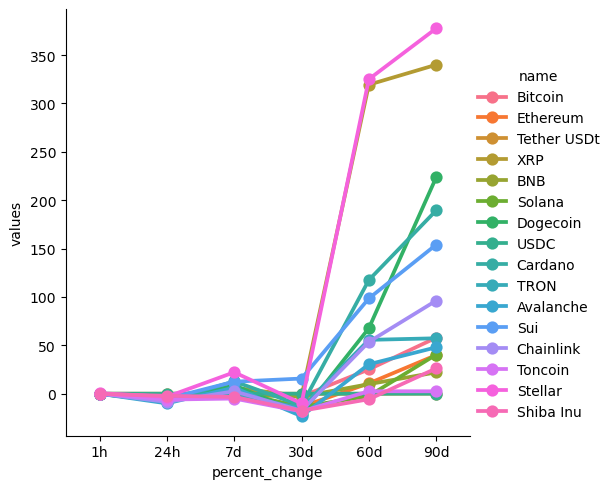

In [47]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [53]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df8 = df3[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,96590.97963,2025-01-08 11:03:30.670854
15,Bitcoin,96565.12273,2025-01-08 11:04:32.812384
30,Bitcoin,96561.95467,2025-01-08 11:05:35.771419
45,Bitcoin,96545.43052,2025-01-08 11:06:37.370739
60,Bitcoin,96545.43052,2025-01-08 11:07:39.504959
75,Bitcoin,96532.11717,2025-01-08 11:08:42.213932
90,Bitcoin,96557.89056,2025-01-08 11:09:44.026641
105,Bitcoin,96548.53105,2025-01-08 11:11:51.798310
120,Bitcoin,96548.53105,2025-01-08 11:12:53.680678
135,Bitcoin,96599.81330,2025-01-08 11:13:56.026207


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

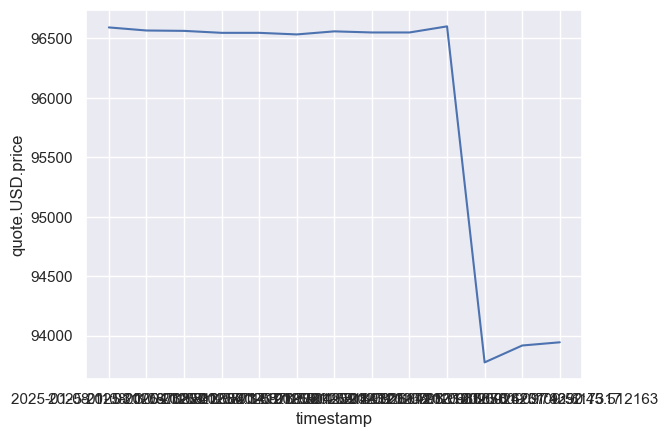

In [51]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)